In [1]:
import pandas as pd
import spacy

In [2]:
labels = ['Quantity', 'Unit', 'Food', 'Variety', 'Preparation', 'Alteration', 'Brand', 'Optional', 'State']

In [3]:
ner_ds = pd.read_json("../../data/NER_data/ner_ls_0_2.json")

In [4]:
ner_ds.head()

,id,annotations,file_upload,drafts,predictions,data,meta,created_at,updated_at,inner_id,total_annotations,cancelled_annotations,total_predictions,comment_count,unresolved_comment_count,last_comment_updated_at,project,updated_by,comment_authors
0,1,"[{'id': 2, 'completed_by': 1, 'result': [{'val...",2249c960-label_s_tasteset.json,[],[1],"{'id': 2101, 'text': '5 ounces rum 4 ounces tr...",{},2025-05-14 14:24:58.753961+00:00,2025-05-14 14:25:08.674942+00:00,1,1,0,1,0,0,NaT,1,1,[]
1,2,"[{'id': 3, 'completed_by': 1, 'result': [{'val...",2249c960-label_s_tasteset.json,[],[2],"{'id': 2102, 'text': '2 tubes cinnamon roll, r...",{},2025-05-14 14:24:58.754033+00:00,2025-05-14 14:29:18.588099+00:00,2,1,0,1,0,0,NaT,1,1,[]
2,3,"[{'id': 4, 'completed_by': 1, 'result': [{'val...",2249c960-label_s_tasteset.json,[],[3],"{'id': 2103, 'text': '4 ripe coconuts 1 cup ev...",{},2025-05-14 14:24:58.754070+00:00,2025-05-14 14:30:25.910344+00:00,3,1,0,1,0,0,NaT,1,1,[]
3,4,"[{'id': 5, 'completed_by': 1, 'result': [{'val...",2249c960-label_s_tasteset.json,[],[4],"{'id': 2104, 'text': '1 sheet graham cracker (...",{},2025-05-14 14:24:58.754104+00:00,2025-05-14 14:31:26.031006+00:00,4,1,0,1,0,0,NaT,1,1,[]
4,5,"[{'id': 6, 'completed_by': 1, 'result': [{'val...",2249c960-label_s_tasteset.json,[],[5],"{'id': 2105, 'text': '1 (8 ounce) package cres...",{},2025-05-14 14:24:58.754139+00:00,2025-05-14 14:32:23.664759+00:00,5,1,0,1,0,0,NaT,1,1,[]


In [5]:
ner_ds.iloc[0]['annotations'][0]['result'][0:2]

[{'value': {'start': 0, 'end': 1, 'text': '5', 'labels': ['Quantity']},
  'id': 'vPB1zoFJIh',
  'from_name': 'label',
  'to_name': 'text',
  'type': 'labels',
  'origin': 'prediction'},
 {'value': {'start': 2, 'end': 8, 'text': 'ounces', 'labels': ['Unit']},
  'id': 'R6fjr7ZVsn',
  'from_name': 'label',
  'to_name': 'text',
  'type': 'labels',
  'origin': 'prediction'}]

In [6]:
from spacy.tokens import DocBin

nlp = spacy.blank("en")

def doc_from_ds(ds):
    db = DocBin()
    for i, [data, annotation] in ds[['data', 'annotations']].iterrows():
        try:
            text = data['text']
            annotation_data = annotation[0]['result']
            doc = nlp.make_doc(text)
            annotation_entities = [
                (annotation['value']['start'],
                annotation['value']['end'],
                annotation['value']['labels'][0])
                for annotation in annotation_data]
            entities = [doc.char_span(*ents)
                        for ents in annotation_entities]
            #entities = [doc.char_span(
            #    start=annotation['value']['start'],
            #    end=annotation['value']['end'],
            #    label=annotation['value']['labels'][0]
            #) for annotation in annotation_data]
            doc.ents = entities
            db.add(doc)
        except TypeError as e:
            print(f"error at index {i}: {e}")
            continue
    return db
    

In [7]:
ner_ds.iloc[162]

id                                                                        163
annotations                 [{'id': 164, 'completed_by': 1, 'result': [{'v...
file_upload                                    2249c960-label_s_tasteset.json
drafts                                                                     []
predictions                                                        [163, 705]
data                        {'id': 2263, 'text': '32 large marshmallows (1...
meta                                                                       {}
created_at                                   2025-05-14 14:24:58.762914+00:00
updated_at                                   2025-05-15 22:33:11.694169+00:00
inner_id                                                                  163
total_annotations                                                           1
cancelled_annotations                                                       0
total_predictions                                               

In [8]:
from sklearn.model_selection import train_test_split
def ds_to_data_split(ds, train_size=0.8, random_state=123):
    train_ds, val_ds = train_test_split(ds, train_size=train_size, random_state=random_state)
    train_bin = doc_from_ds(train_ds)
    val_bin = doc_from_ds(val_ds)

    return train_bin, val_bin

In [9]:
train_bin, val_bin =  ds_to_data_split(ner_ds)
train_path = "../../data/NER_data/spacy/test_train.spacy"
val_path = "../../data/NER_data/spacy/test_val.spacy"
train_bin.to_disk(train_path)
val_bin.to_disk(val_path)

error at index 162: object of type 'NoneType' has no len()
error at index 306: object of type 'NoneType' has no len()
error at index 202: object of type 'NoneType' has no len()
error at index 201: object of type 'NoneType' has no len()
error at index 364: object of type 'NoneType' has no len()
error at index 29: object of type 'NoneType' has no len()
error at index 163: object of type 'NoneType' has no len()
error at index 219: object of type 'NoneType' has no len()
error at index 378: object of type 'NoneType' has no len()
error at index 122: object of type 'NoneType' has no len()
error at index 62: object of type 'NoneType' has no len()
error at index 342: object of type 'NoneType' has no len()
error at index 472: object of type 'NoneType' has no len()
error at index 418: object of type 'NoneType' has no len()
error at index 126: object of type 'NoneType' has no len()
error at index 490: object of type 'NoneType' has no len()
error at index 242: object of type 'NoneType' has no len()

In [10]:
from dotenv import load_dotenv
import os

load_dotenv()

True

In [66]:
import subprocess

def gen_config(train_path: str, dev_path:str, train_log_path: str, out_path: str):
    BASE_CONFIG = f"""[paths]
    train = {train_path}
    dev = {dev_path}
    vectors = null
    [system]
    gpu_allocator = null
    
    [nlp]
    lang = "en"
    pipeline = ["tok2vec", "tagger", "attribute_ruler", "lemmatizer", "ner"]
    batch_size = 1000
    
    [components]
    
    [components.tok2vec]
    factory = "tok2vec"
    
    [components.tok2vec.model]
    @architectures = "spacy.Tok2Vec.v2"
    
    [components.tok2vec.model.embed]
    @architectures = "spacy.MultiHashEmbed.v2"
    width = ${{components.tok2vec.model.encode.width}}
    attrs = ["NORM", "PREFIX", "SUFFIX", "SHAPE"]
    rows = [5000, 1000, 2500, 2500]
    include_static_vectors = false
    
    [components.tok2vec.model.encode]
    @architectures = "spacy.MaxoutWindowEncoder.v2"
    width = 96
    depth = 4
    window_size = 1
    maxout_pieces = 3

    [components.tagger]
    source = "en_core_web_sm"
    component = "tagger"

    [components.attribute_ruler]
    source = "en_core_web_sm"
    component = "attribute_ruler"

    [components.lemmatizer]
    source = "en_core_web_sm"
    component = "lemmatizer"
    
    [components.ner]
    factory = "ner"
    
    [components.ner.model]
    @architectures = "spacy.TransitionBasedParser.v2"
    state_type = "ner"
    extra_state_tokens = false
    hidden_width = 64
    maxout_pieces = 2
    use_upper = true
    nO = null
    
    [components.ner.model.tok2vec]
    @architectures = "spacy.Tok2VecListener.v1"
    width = ${{components.tok2vec.model.encode.width}}
    
    [corpora]
    
    [corpora.train]
    @readers = "spacy.Corpus.v1"
    path = ${{paths.train}}
    max_length = 0
    
    [corpora.dev]
    @readers = "spacy.Corpus.v1"
    path = ${{paths.dev}}
    max_length = 0
    
    [training]
    dev_corpus = "corpora.dev"
    train_corpus = "corpora.train"
    frozen_components = ["tagger", "attribute_ruler", "lemmatizer"]
    
    [training.optimizer]
    @optimizers = "Adam.v1"
    
    [training.batcher]
    @batchers = "spacy.batch_by_words.v1"
    discard_oversize = false
    tolerance = 0.2
    
    [training.batcher.size]
    @schedules = "compounding.v1"
    start = 100
    stop = 1000
    compound = 1.001
    
    [initialize]
    vectors = ${{paths.vectors}}
    
    [training.logger]
    @loggers = "spacy.ConsoleLogger.v3"
    progress_bar = "eval"
    console_output = true
    output_file = {train_log_path}
    """

    with open("temp.cfg", 'w') as f:
      f.write(BASE_CONFIG)
    subprocess.call(['python', '-m', 'spacy', 'init', 'fill-config', 'temp.cfg', out_path])
    os.remove('temp.cfg')

In [67]:
log_path = "train_log.jsonl"
cfg_path = "config.cfg"
gen_config(train_path, val_path, log_path, cfg_path)

✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [68]:
import spacy
import mlflow
import mlflow.spacy
from pathlib import Path
import json
from spacy.util import minibatch, compounding
from spacy.cli.train import train

In [69]:
def train_ner(model_dir: Path, config_path: Path):
    train(config_path, model_dir)
    nlp = spacy.load(Path(model_dir) / 'model-best')
    
    mlflow.log_artifact(config_path)
    mlflow.spacy.log_model(spacy_model=nlp, artifact_path="model")
    mlflow.set_tag('model_flavor', 'spacy')
    model_uri = f"runs:/{mlflow.active_run().info.run_id}/model"
    return(model_uri)

In [70]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def plot_conf_mat(model_uri: str, val_path: Path):
    nlp = mlflow.spacy.load_model(model_uri=model_uri)
    test_set = list(DocBin().from_disk(val_path).get_docs(nlp.vocab))
    pred_ents = []
    true_ents = []
    
    for recipe in test_set:
      # tok.ent_type_ gets the ent per token, as opposed to breaking the Doc into
      # entities. This ensures that `true_ents` and `pred_ents` are the same length.
      true_ents += [tok.ent_type_ for tok in recipe]
      # `recipe.text` grabs the raw recipe, because `recipe` already contains entity
      # labels.
      pred_ents += [tok.ent_type_ for tok in nlp(recipe.text)]
    # create and display the confusion matrix
    cm = confusion_matrix(true_ents, pred_ents, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    f = disp.plot(xticks_rotation=70).figure_
    mlflow.log_figure(f, 'plots/confusion_matrix.png')

In [71]:
def log_metrics(model_uri: str, train_log_path: Path, val_path: Path):
    mlflow.log_artifact(train_log_path)
    with open(train_log_path) as f:
        for line in f:
            line_data = json.loads(line)
            if line_data['step'] == 0:
                continue
            step = line_data['step']
            for key, value in line_data['losses'].items():
                mlflow.log_metric(f"loss_{key}", value, step)
            for key, value in line_data['scores'].items():
                mlflow.log_metric(f"score_{key}", value, step)
            mlflow.log_metric(f"score", line_data['score'], step)
    plot_conf_mat(model_uri, val_path)

In [72]:
def run_mlflow_pipe(train_path: Path, val_path: Path, model_dir: Path, config_path: Path, train_log_path: Path):
    mlflow.set_tracking_uri(os.getenv("MLFLOW_TRACKING_URL"))
    mlflow.set_experiment("jupyter_NER")
    if os.path.exists(train_log_path):
        os.remove(train_log_path)
    with mlflow.start_run(run_name="jupyer_test") as run:
        model_uri = train_ner(model_dir, config_path)
        log_metrics(model_uri, train_log_path, val_path)
    return model_uri

ℹ Saving to output directory: output_eff
ℹ Using CPU

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer',
'ner']
ℹ Frozen components: ['tagger', 'attribute_ruler', 'lemmatizer']
ℹ Initial learn rate: 0.001
ℹ Saving results to train_log.jsonl
E    #       LOSS TOK2VEC  LOSS NER  TAG_ACC  LEMMA_ACC  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  -------  ---------  ------  ------  ------  ------
  0       0          0.00     49.42     0.00       0.00   19.48   16.24   24.32    0.06
  1     200        278.53   4785.51     0.00       0.00   85.27   86.27   84.29    0.28
  2     400        866.57   2418.31     0.00       0.00   87.79   88.93   86.69    0.29
  4     600        641.81   1963.83     0.00       0.00   88.46   90.59   86.42    0.29
  7     800        450.90   1594.34

2025/06/11 12:41:48 WARNING mlflow.spacy: Generating only the spacy flavor for the provided spacy model. This means the model can be loaded back via `mlflow.spacy.load_model`, but cannot be loaded back using pyfunc APIs like `mlflow.pyfunc.load_model` or via the `mlflow models` CLI commands. MLflow will only generate the pyfunc flavor for spacy models containing a pipeline component that is an instance of spacy.pipeline.TextCategorizer.
2025/06/11 12:41:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/home/naabzer/develop/recipe_tm/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🏃 View run jupyer_test at: https://mlflow.local.agefvert.com/#/experiments/466776196716148841/runs/4c45bce0952545ccb0307cda45521199
🧪 View experiment at: https://mlflow.local.agefvert.com/#/experiments/466776196716148841


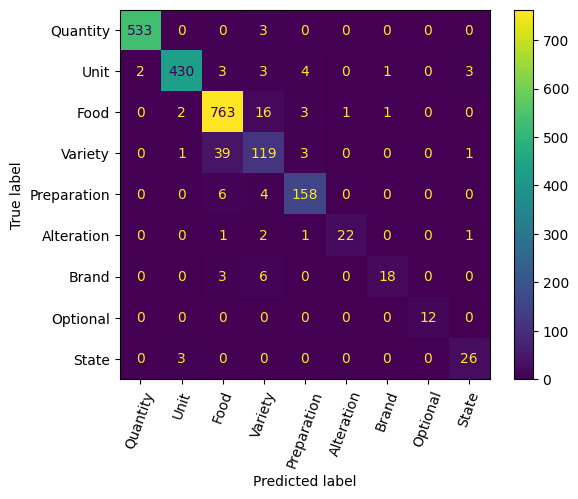

In [73]:
model_uri = run_mlflow_pipe(train_path, val_path, "output_eff/", cfg_path, log_path)

In [ ]:
nlp = mlflow.spacy.load_model(model_uri=model_uri)

In [47]:
test_set = list(DocBin().from_disk(val_path).get_docs(nlp.vocab))
pred_ents = []
true_ents = []

for recipe in test_set:
    # tok.ent_type_ gets the ent per token, as opposed to breaking the Doc into
    # entities. This ensures that `true_ents` and `pred_ents` are the same length.
    true_ents += [tok.ent_type_ for tok in recipe]
    # `recipe.text` grabs the raw recipe, because `recipe` already contains entity
    # labels.
    pred_ents += [tok.ent_type_ for tok in nlp(recipe.text)]

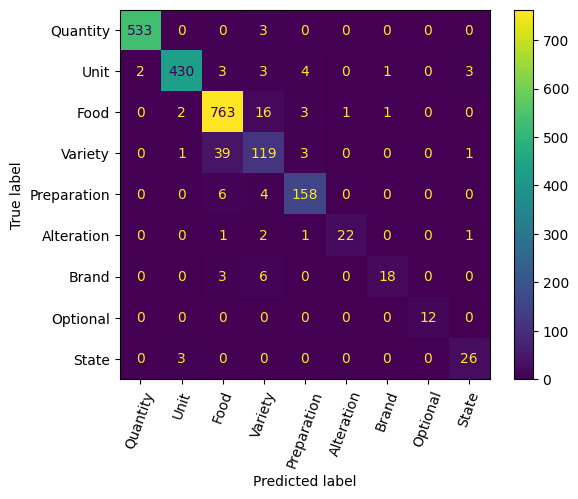

In [20]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# create and display the confusion matrix
cm = confusion_matrix(true_ents, pred_ents, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig = disp.plot(xticks_rotation=70)
#fig.figure_.xticks(rotation=70)

### Testing on real data

In [22]:
nlg_ds = pd.read_csv('../../data/recipenlg/RecipeNLG_dataset.csv', converters={'ingredients': pd.eval}, nrows=5)

In [38]:
nlg_ds.head()
ingredient_texts = []
for ingredient in nlg_ds['ingredients']:
    ingredient_texts.append(nlp("\n".join(ingredient)))

In [36]:
nlg_ds.head()
ingredient_texts = []
for ingredient in nlg_ds['ingredients']:
    ing = [nlp(i) for i in ingredient]
    ingredient_texts += ing

In [40]:
dir(tok)

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 'ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_kb_id',
 'ent_kb_id_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_dep',
 'has_extension',
 'has_head',
 'has_morph',
 'has_vector',
 'head',
 'i',
 'idx',
 'iob_strings',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_currency',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_end',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang',
 'lang_',
 'le

In [48]:
[1,2,3,4][1:]

[2, 3, 4]

In [43]:
for tok in ingredient_texts[0]:
    print(tok, tok.is_space)

1 False
c. False
firmly False
packed False
brown False
sugar False

 True
1/2 False
c. False
evaporated False
milk False

 True
1/2 False
tsp False
. False
vanilla False

 True
1/2 False
c. False
broken False
nuts False
( False
pecans False
) False

 True
2 False
Tbsp False
. False
butter False
or False
margarine False

 True
3 False
1/2 False
c. False
bite False
size False
shredded False
rice False
biscuits False


In [25]:
from spacy import displacy

In [37]:
len(ingredient_texts)

26

In [34]:
displacy.render(ingredient_texts, style='ent')

In [32]:
displacy.render(ingredient_texts, style='ent')